Imports

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

# Hypothesis Testing

So far, I have identified two trends during my exploratory data analysis. I am going to use hypothesis testing to determine if they are in fact statistically significant. The two trends are:
 - Senators that declare a presidential campaign seem to miss more votes
 - Speakers of the house seem to miss more votes

## Hypothesis Test 1: Presidential Hopefuls

I identified a trend of senators missing more votes during Congressional Sessions in which they declare their candidacy for President. I am going to determine if this is statistically significant using hypothesis testing.

Null Hypothesis: The mean number of missed votes for senators who declare presidential campaigns is the same as the mean number of missed votes for senators overall.

Alternative Hypothesis: The mean number of missed votes for senators who declare presidential campaigns is greater than the mean number of missed votes for senators overall.

$H_0: \mu_P = \mu_0$

$H_a: \mu_P > \mu_0$

In [2]:
names_to_ids = {'Gore': 'G000321',
         'Harkin': 'H000206',
         'Kerrey': 'K000146',
         'McCain': 'M000303',
         'Edwards': 'E000286',
         'Bob Graham': 'G000352',
         'Kerry': 'K000148',
         'Lieberman': 'L000304',
         'Biden': 'B000444',
         'Brownback': 'B000953',
         'Clinton': 'C001041',
         'Dodd': 'D000388',
         'Obama': 'O000167',
         'Cruz': 'C001098',
         'Rubio': 'R000595',
         'Sanders': 'S000033',
         'Lindsey Graham' : 'G000359',
         'Bennet': 'B001267',
         'Booker': 'B001288',
         'Gillibrand': 'G000555',
         'Harris': 'H001075',
         'Klobuchar': 'K000367',
         'Warren': 'W000817'}
ids_to_sessions = {'G000321' : [102],
         'H000206' : [102],
         'K000146' : [102],
         'M000303' : [106, 110],
         'E000286' :[108],
         'G000352' : [108],
         'K000148' : [108],
         'L000304' : [108],
         'B000444' : [110],
         'B000953' : [110],
         'C001041' : [110],
         'D000388' : [110],
         'O000167' : [110],
         'C001098' : [114],
         'R000595' : [114],
         'S000033' : [114, 116],
         'G000359' : [114],
         'B001267' : [116],
         'B001288' : [116],
         'G000555' : [116],
         'H001075' : [116],
         'K000367' : [116],
         'W000817' : [116]}

sessions_to_ids = {102: ['G000321', 'H000206', 'K000146'],
                     106: ['M000303'],
                     110: ['M000303', 'B000444', 'B000953', 'C001041', 'D000388', 'O000167'],
                     108: ['E000286', 'G000352', 'K000148', 'L000304'],
                     114: ['C001098', 'R000595', 'S000033', 'G000359'],
                     116: ['S000033', 'B001267', 'B001288', 'G000555', 'H001075', 'K000367', 'W000817']}

In [3]:
presidential_hopefuls_congress_sessions = [102, 102, 102, 106, 108, 108, 108, 108, 
                                        110, 110, 110, 110, 110, 110, 114, 114, 114, 114, 
                                        116, 116, 116, 116, 116, 116, 116]
presidential_hopefuls_missed_votes = [119, 139, 105, 198, 305, 170, 488, 264, 
                                    209, 142, 208, 171, 420, 303, 162, 123, 157, 143, 
                                    129, 287, 110, 266, 201, 347, 275]

In [4]:
senators_missed_votes = []
for session in range(101, 117):
    df = pd.read_csv('../congress-data/senate/senate_%d.csv' % session, index_col=0)
    if session in sessions_to_ids.keys():
        members_to_exclude = sessions_to_ids[session]
    else:
        members_to_exclude = []
    df = df[~df['id'].isin(members_to_exclude)]
    missed_votes = df['missed_votes'].values
    senators_missed_votes.extend(missed_votes)
    


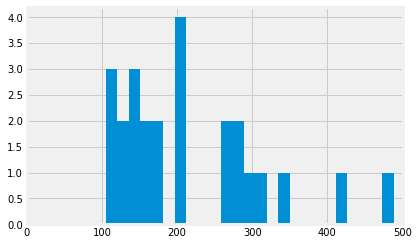

In [5]:
fig, ax = plt.subplots()
ax.hist(presidential_hopefuls_missed_votes, bins=25)
ax.set_xlim(0, 500);

(0, 100)

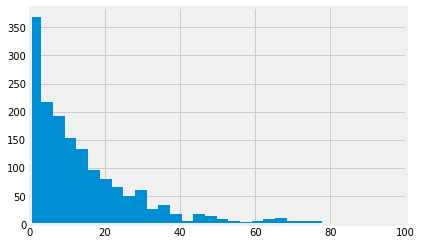

In [6]:
fig, ax = plt.subplots()
ax.hist(senators_missed_votes, bins=100)
ax.set_xlim(0, 100)

In [7]:
print('Presidential Hopefuls Sample Size: %d' % (len(presidential_hopefuls_missed_votes)))
print('Other Senators Sample Size: %d' % (len(senators_missed_votes)))

Presidential Hopefuls Sample Size: 25
Other Senators Sample Size: 1623


Because the sample sizes are so different, and the distributions do not follow a normal distribution, we should use a non-parametric test to test our hypothesis: The Mann-Whitney U-test

Null: The mean number of missed votes for senators who are not running is equally likely to be higher than the mean number of missed votes for senators who are running, and vice versa.

P(mean_not_running > mean_running) = 0.5

In [8]:
res = scs.mannwhitneyu(presidential_hopefuls_missed_votes, senators_missed_votes, alternative='greater')
print('p-value for mean_running < mean_not_running: %.2f' % res.pvalue)

p-value for mean_running < mean_not_running: 0.00


With a p-val of what is essentially 0, we can easily reject our null hypothesis and determine that this is statistically significant

## Now lets look at just presidential candidates and their missed votes when they werent running

In [10]:
ids = set(['G000321', 'H000206', 'K000146', 'M000303', 'E000286', 
       'G000352', 'K000148', 'L000304', 'B000444', 'B000953', 
       'C001041', 'D000388', 'O000167', 'C001098', 'R000595', 
       'S000033', 'G000359', 'B001267', 'B001288', 'G000555', 
       'H001075', 'K000367', 'W000817'])

In [11]:
non_running_missed_votes = []
for session in range(101, 117):
    df = pd.read_csv('../congress-data/senate/senate_%d.csv' % session, index_col=0)    
    if session in sessions_to_ids.keys():
        members_to_exclude = sessions_to_ids[session]
    else:
        members_to_exclude = []
        
    non_running = ids - set(members_to_exclude)
        
    df = df[df['id'].isin(non_running)]
    missed_votes = df['missed_votes'].values
    non_running_missed_votes.extend(missed_votes)

(array([16., 12., 17., 10.,  7., 12.,  7.,  4., 11.,  5.,  4.,  5.,  3.,
         9.,  3.,  1.,  0.,  0.,  2.,  3.,  2.,  0.,  1.,  0.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  0.  ,   2.36,   4.72,   7.08,   9.44,  11.8 ,  14.16,  16.52,
         18.88,  21.24,  23.6 ,  25.96,  28.32,  30.68,  33.04,  35.4 ,
         37.76,  40.12,  42.48,  44.84,  47.2 ,  49.56,  51.92,  54.28,
         56.64,  59.  ,  61.36,  63.72,  66.08,  68.44,  70.8 ,  73.16,
         75.52,  77.88,  80.24,  82.6 ,  84.96,  87.32,  89.68,  92.04,
         94.4 ,  96.76,  99.12, 101.48, 103.84, 106.2 , 108.56, 110.92,
  

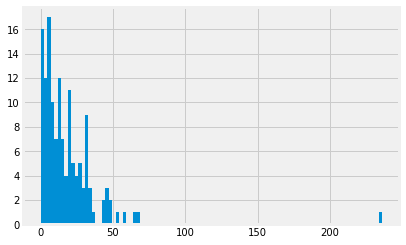

In [34]:
fig, ax = plt.subplots()
ax.hist(non_running_missed_votes, bins=100)
#ax.set_xlim(0, 100)

In [15]:
res = scs.mannwhitneyu(presidential_hopefuls_missed_votes, non_running_missed_votes, alternative='greater')
print('p-value for mean_running < mean_not_running: %.2f' % res.pvalue)

p-value for mean_running < mean_not_running: 0.00


With a p-val of 0, we can determine that running a campaign for president will cause a senator to miss more votes.

## Hypothesis Test 2: Speakers of the House

I identified a trend of Speakers of the House missing more votes than representatives not in that role. I am going to determine if this is statistically significant using hypothesis testing.

Null Hypothesis: The mean number of missed votes for Speakers of the House is the same as the mean number of missed votes for representatives overall.

Alternative Hypothesis: The mean number of missed votes for Speakers of the House is greater than the mean number of missed votes for representatives overall.

$H_0: \mu_S = \mu_R$

$H_a: \mu_S > \mu_R$

In [17]:
names_to_ids = {'Boehner' : 'B000589', 
                'Foley' : 'F000239', 
                'Gingrich' : 'G000225', 
                'Hastert' : 'H000323', 
                'Pelosi' : 'P000197', 
                'Ryan': 'R000570'}

sessions_to_ids = {103: 'F000239',
                   104: 'G000225',
                   105: 'G000225',
                   106: 'H000323',
                   107: 'H000323',
                   108: 'H000323',
                   109: 'H000323',
                   110: 'P000197',
                   111: 'P000197',
                   112: 'B000589',
                   113: 'B000589',
                   114: 'R000570',
                   115: 'R000570',
                   116: 'P000197'}

In [29]:
rep_missed_votes = []
for session in range(103, 117):
    df = pd.read_csv('../congress-data/house/house_%d.csv' % session, index_col=0)
    speaker = sessions_to_ids[session]
    
    df = df[df['id'] != speaker]
    rep_missed_votes.extend(df['missed_votes'].values)

In [18]:
speaker_missed_votes = []
non_speaker_missed_votes = []
set_of_ids = set(['B000589', 'F000239', 'G000225', 
                'H000323', 'P000197', 'R000570'])
for session in range(103, 117):
    df = pd.read_csv('../congress-data/house/house_%d.csv' % session, index_col=0)
    
    speaker = sessions_to_ids[session]
    non_speakers = set_of_ids - set([speaker])
    
    non_speaker_df = df[df['id'].isin(non_speakers)]
    speaker_df = df[df['id'] == speaker]
    
    non_speaker_missed_votes.extend(non_speaker_df['missed_votes'].values)
    speaker_missed_votes.extend(speaker_df['missed_votes'].values)


In [19]:
len(speaker_missed_votes)

14

In [20]:
len(non_speaker_missed_votes)

34

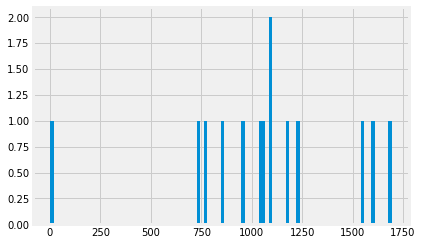

In [24]:
fig, ax = plt.subplots()
ax.hist(speaker_missed_votes, bins=100);


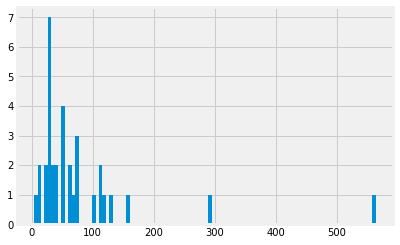

In [25]:
fig, ax = plt.subplots()
ax.hist(non_speaker_missed_votes, bins=100);

Again, it is very hard to say that this is normally distributed, one way or the other, so lets look at a mannn-whitney u-test.

In [27]:
res = scs.mannwhitneyu(speaker_missed_votes, non_speaker_missed_votes, alternative='greater')
print('p-val that mean_speaker_missed < mean_non_speaker_missed: %.2f' % res.pvalue)

p-val that mean_speaker_missed < mean_non_speaker_missed: 0.00


In [30]:
len(rep_missed_votes)

6201

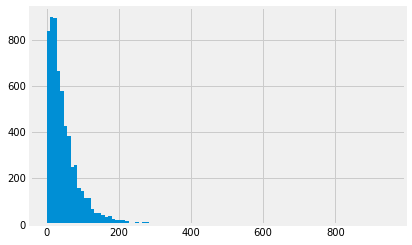

In [31]:
fig, ax = plt.subplots()
ax.hist(rep_missed_votes, bins=100);

In [32]:
res = scs.mannwhitneyu(speaker_missed_votes, rep_missed_votes, alternative='greater')
print('p-val that mean_speaker_missed < mean_rep_missed: %.2f' % res.pvalue)

p-val that mean_speaker_missed < mean_rep_missed: 0.00
